In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('./Final.csv')

In [31]:
df

,Training_time,Training_loss,Accuracy,Evaluation_time,Algo_name,Epoch_1_loss,Epoch_2_loss,Epoch_3_loss,Epoch_4_loss,Epoch_5_loss
0,1590.718110,0.018674,0.9335,33.509860,Squeezenet,0.047625,0.032714,0.023653,0.018934,0.018674
1,1996.334482,0.017709,0.9593,42.541661,Alexnet,0.041091,0.029700,0.023811,0.021396,0.017709
2,14564.113199,0.009048,0.9795,161.431821,Resnet,0.030854,0.018390,0.014692,0.011121,0.009048
3,28434.280808,0.013307,0.9733,435.585789,Inception,0.054795,0.027076,0.019069,0.015637,0.013307
4,20710.632123,0.047787,0.8917,414.524971,Densenet,0.138760,0.095402,0.073808,0.055604,0.047787


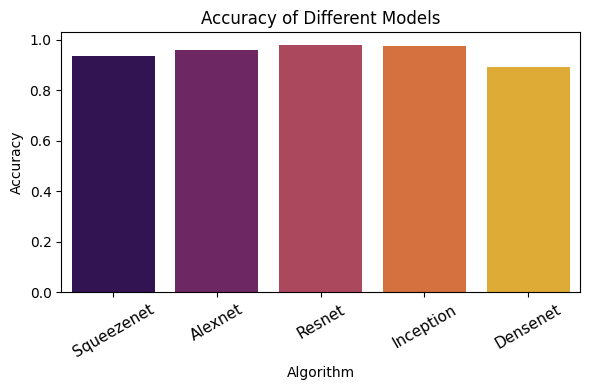

In [60]:
plt.figure(figsize=(6,4))
sns.barplot(x='Algo_name', y='Accuracy', data=df, hue='Algo_name', palette='inferno', dodge=False)
plt.title('Accuracy of Different Models')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(fontsize=11, rotation=30)
plt.tight_layout()

# Save the plot before displaying it
plt.savefig('accuracy.png', bbox_inches='tight')

# Now display the plot
plt.show()

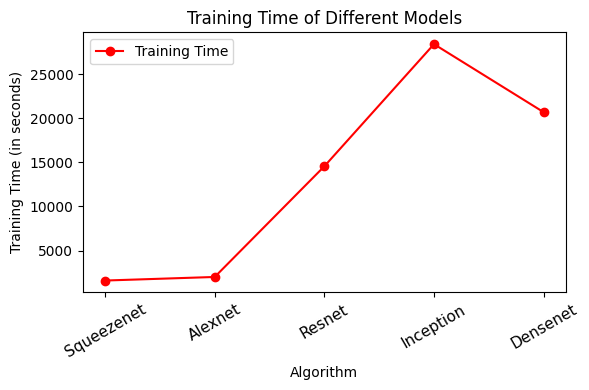

In [69]:
plt.figure(figsize=(6, 4))

plt.plot(df['Algo_name'], df['Training_time'], marker='o', color='r', label='Training Time')

plt.title('Training Time of Different Models')
plt.xlabel('Algorithm')
plt.ylabel('Training Time (in seconds)')

plt.xticks(ticks=range(len(df)), labels=df['Algo_name'], fontsize=11,rotation=30)

plt.legend()

plt.tight_layout()
plt.savefig('training_time.png', bbox_inches='tight')
plt.show()


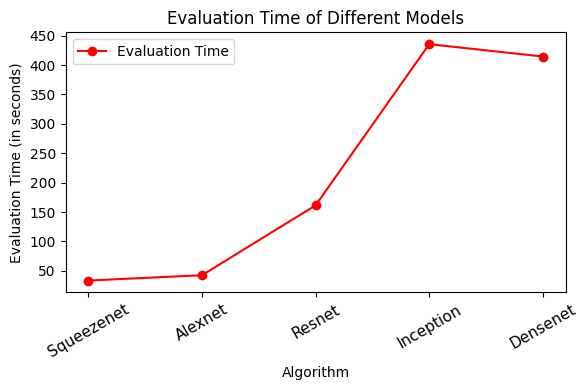

In [70]:
plt.figure(figsize=(6, 4))


plt.plot(df['Algo_name'], df['Evaluation_time'], marker='o', color='r',label='Evaluation Time')


plt.title('Evaluation Time of Different Models')
plt.xlabel('Algorithm')
plt.ylabel('Evaluation Time (in seconds)')

plt.xticks(ticks=range(len(df)), labels=df['Algo_name'], fontsize=11,rotation=30)

plt.legend()

plt.tight_layout()
plt.savefig('evaluation_time.png', bbox_inches='tight')
plt.show()


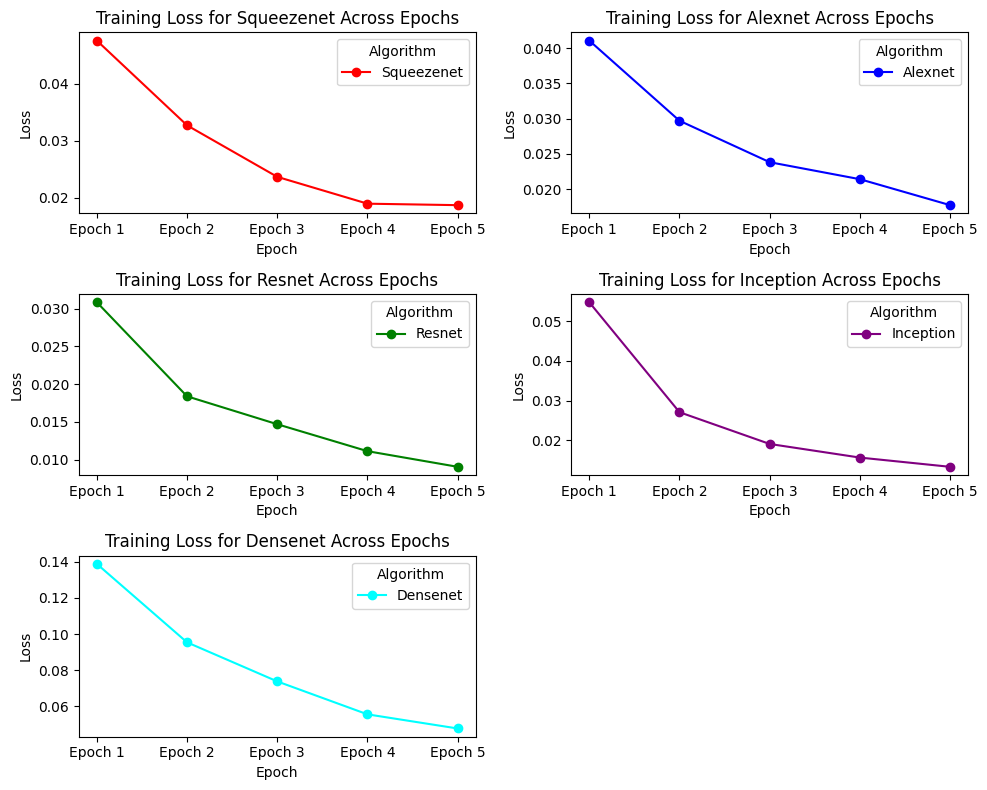

In [77]:
import matplotlib.pyplot as plt

# Get unique algorithms from the DataFrame
algorithms = df['Algo_name'].unique()

# Define colors for each algorithm
colors = ['red', 'blue', 'green', 'purple', 'cyan']

# Create a figure with subplots: 1 row and 2 columns
n_algorithms = len(algorithms)
n_cols = 2  # Two plots in one row
n_rows = (n_algorithms + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8))

# If there's only one algorithm, ensure axes is a 1D array for indexing
if n_rows == 1:
    axes = [axes]

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each algorithm and plot its training loss
for idx, algo in enumerate(algorithms):
    algo_data = df[df['Algo_name'] == algo]
    
    epochs = ['Epoch 1', 'Epoch 2', 'Epoch 3', 'Epoch 4', 'Epoch 5']
    
    axes[idx].plot(epochs, 
                   [algo_data[f'Epoch_{i}_loss'].values[0] for i in range(1, 6)],
                   label=f'{algo}', marker='o', linestyle='-', color=colors[idx])
    
    axes[idx].set_title(f'Training Loss for {algo} Across Epochs')
    axes[idx].set_xlabel('Epoch')
    axes[idx].set_ylabel('Loss')
    axes[idx].legend(title='Algorithm')

# Hide any unused subplots
for j in range(idx + 1, n_rows * n_cols):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the entire collage as one image
plt.savefig('training_loss_collage.png', bbox_inches='tight')

# Show the collage
plt.show()


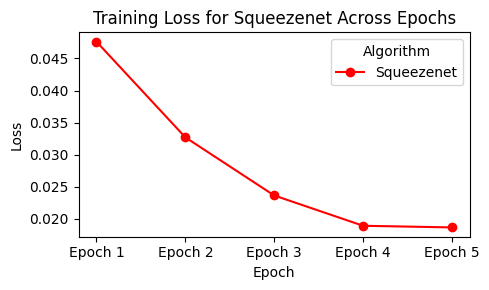

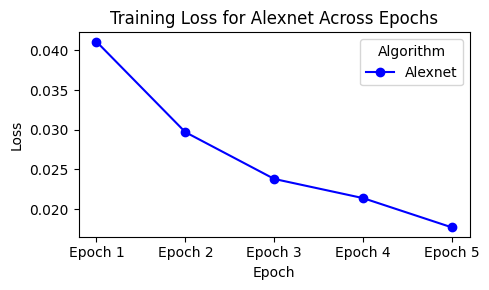

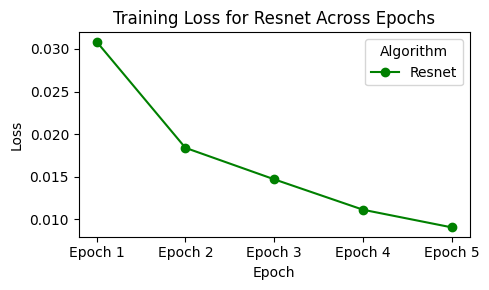

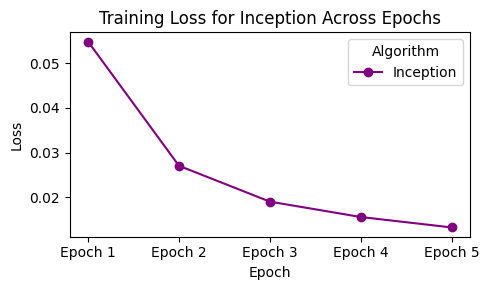

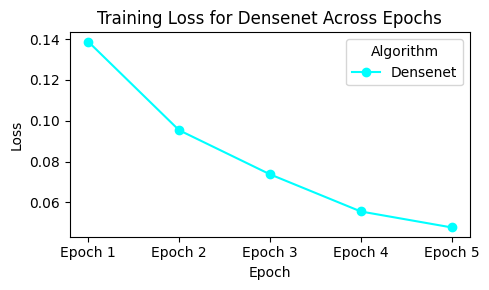

In [35]:
algorithms = df['Algo_name'].unique()

colors = ['red', 'blue', 'green', 'purple', 'cyan']

for idx, algo in enumerate(algorithms):
    plt.figure(figsize=(5, 3))

    algo_data = df[df['Algo_name'] == algo]

    epochs = ['Epoch 1', 'Epoch 2', 'Epoch 3', 'Epoch 4', 'Epoch 5']
    
    plt.plot(epochs, 
             [algo_data[f'Epoch_{i}_loss'].values[0] for i in range(1, 6)],
             label=f'{algo}', marker='o', linestyle='-', color=colors[idx])
    
    plt.title(f'Training Loss for {algo} Across Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    plt.legend(title='Algorithm')
    # plt.xticks(fontsize=11,rotation=30)
    
    plt.tight_layout()
    plt.savefig(f'{algo}_epoch.png', bbox_inches='tight')
    plt.show()

In [52]:
df1= pd.read_csv('./Final.csv')

In [53]:
df1.drop(columns=['Training_time', 'Evaluation_time',])

,Training_loss,Accuracy,Algo_name,Epoch_1_loss,Epoch_2_loss,Epoch_3_loss,Epoch_4_loss,Epoch_5_loss
0,0.018674,0.9335,Squeezenet,0.047625,0.032714,0.023653,0.018934,0.018674
1,0.017709,0.9593,Alexnet,0.041091,0.029700,0.023811,0.021396,0.017709
2,0.009048,0.9795,Resnet,0.030854,0.018390,0.014692,0.011121,0.009048
3,0.013307,0.9733,Inception,0.054795,0.027076,0.019069,0.015637,0.013307
4,0.047787,0.8917,Densenet,0.138760,0.095402,0.073808,0.055604,0.047787


In [54]:
df_percentage = df1.copy()
for col in df_percentage.columns:
    if col != 'Algo_name':  # Skip the 'Algo_name' column
        df_percentage[col] = (df_percentage[col] * 100).round(2)

df_percentage

,Training_time,Training_loss,Accuracy,Evaluation_time,Algo_name,Epoch_1_loss,Epoch_2_loss,Epoch_3_loss,Epoch_4_loss,Epoch_5_loss
0,159071.81,1.87,93.35,3350.99,Squeezenet,4.76,3.27,2.37,1.89,1.87
1,199633.45,1.77,95.93,4254.17,Alexnet,4.11,2.97,2.38,2.14,1.77
2,1456411.32,0.90,97.95,16143.18,Resnet,3.09,1.84,1.47,1.11,0.90
3,2843428.08,1.33,97.33,43558.58,Inception,5.48,2.71,1.91,1.56,1.33
4,2071063.21,4.78,89.17,41452.50,Densenet,13.88,9.54,7.38,5.56,4.78


In [55]:
columns_order = ['Algo_name', 'Accuracy', 'Training_loss',
                 'Epoch_1_loss', 'Epoch_2_loss', 'Epoch_3_loss', 'Epoch_4_loss', 'Epoch_5_loss']

In [56]:
df_percentage = df_percentage[columns_order]

Table saved as cnn_comparison_table.png


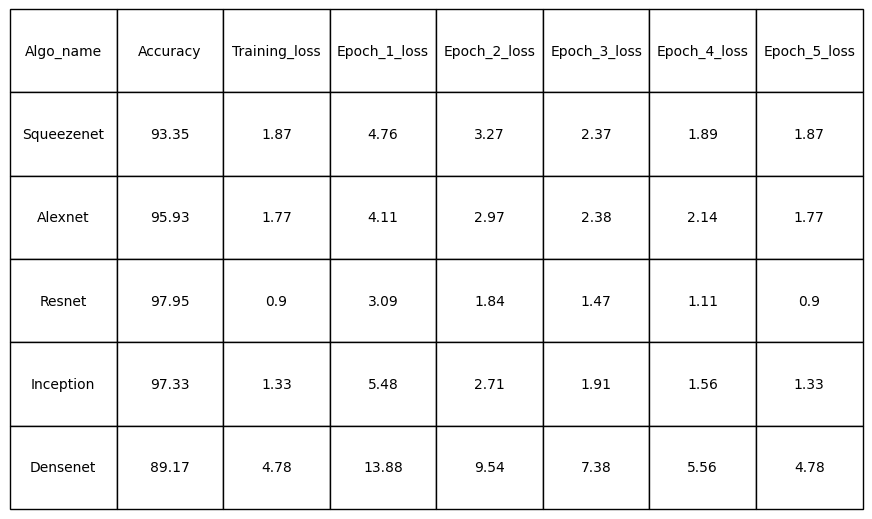

In [72]:
fig, ax = plt.subplots(figsize=(10, 4))  # Set the size of the figure
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_percentage.values, colLabels=df_percentage.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)  # Disable automatic font size adjustment
table.set_fontsize(10)  # Set the desired font size
table.scale(1.1, 5)

# Save the table as a PNG file
plt.savefig("cnn_comparison_table.png")

# Display success message
print("Table saved as cnn_comparison_table.png")

In [15]:
from prettytable import PrettyTable


table = PrettyTable()

table.field_names = [ 'Algo_name','Accuracy', 'Training_loss', 
                     'Epoch_1_loss', 'Epoch_2_loss', 'Epoch_3_loss', 'Epoch_4_loss', 'Epoch_5_loss']

for row in df1.values:
    table.add_row(row)

print(table)

+------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Algo_name  | Accuracy |   Training_loss    |    Epoch_1_loss    |    Epoch_2_loss    |    Epoch_3_loss    |    Epoch_4_loss    |    Epoch_5_loss    |
+------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Squeezenet |  0.9335  | 0.018674397805434  | 0.0476250846449159 | 0.0327139486159597 | 0.0236526886398995 | 0.0189340505886148 | 0.018674397805434  |
|  Alexnet   |  0.9593  | 0.0177089191825075 | 0.0410906732389607 | 0.0297004437521209 | 0.0238107213742251 | 0.0213961961880787 | 0.0177089191825075 |
|   Resnet   |  0.9795  | 0.0090484712451191 | 0.0308535708901808 | 0.0183896268217307 | 0.0146918422947137 | 0.0111209826766127 | 0.0090484712451191 |
| Inception  |  0.9733  | 0.0133074612434904 | 0.0547953869966414 | 0.0270755238425046 |

Image loaded successfully!


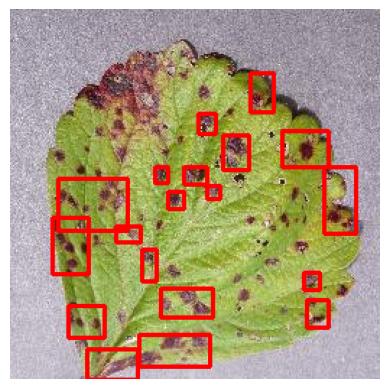

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "./0c3c9e71-d339-4201-a32a-7a28f0556258___RS_L.Scorch 0930.JPG"
image = cv2.imread(image_path)

# Check if the image was loaded
if image is None:
    print("Error: Image not found or unable to load.")
else:
    print("Image loaded successfully!")

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for diseased parts (red/brownish areas)
lower_red_brown = np.array([0, 50, 50])  # Adjusted for red tones
upper_red_brown = np.array([20, 255, 255])

# Create a mask for the diseased parts based on red/brown hues
disease_mask = cv2.inRange(hsv_image, lower_red_brown, upper_red_brown)

# Apply some morphological operations to clean the mask
kernel = np.ones((8, 8), np.uint8)
disease_mask = cv2.morphologyEx(disease_mask, cv2.MORPH_CLOSE, kernel)

# Find contours in the mask
contours, _ = cv2.findContours(disease_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Set a minimum and maximum contour area to detect smaller diseased areas across both leaves
min_contour_area = 50   # Lowered to detect smaller regions
max_contour_area = 1200  # Ensures boxes are smaller and more granular

# Draw bounding boxes around the detected diseased areas
for contour in contours:
    contour_area = cv2.contourArea(contour)
    if min_contour_area < contour_area < max_contour_area:  # Filter out small and large contours
        x, y, w, h = cv2.boundingRect(contour)

        # Draw the rectangle (bounding box) around diseased areas
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Green box

# Convert the image to RGB for Matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis
plt.savefig('detect.png')
plt.show()


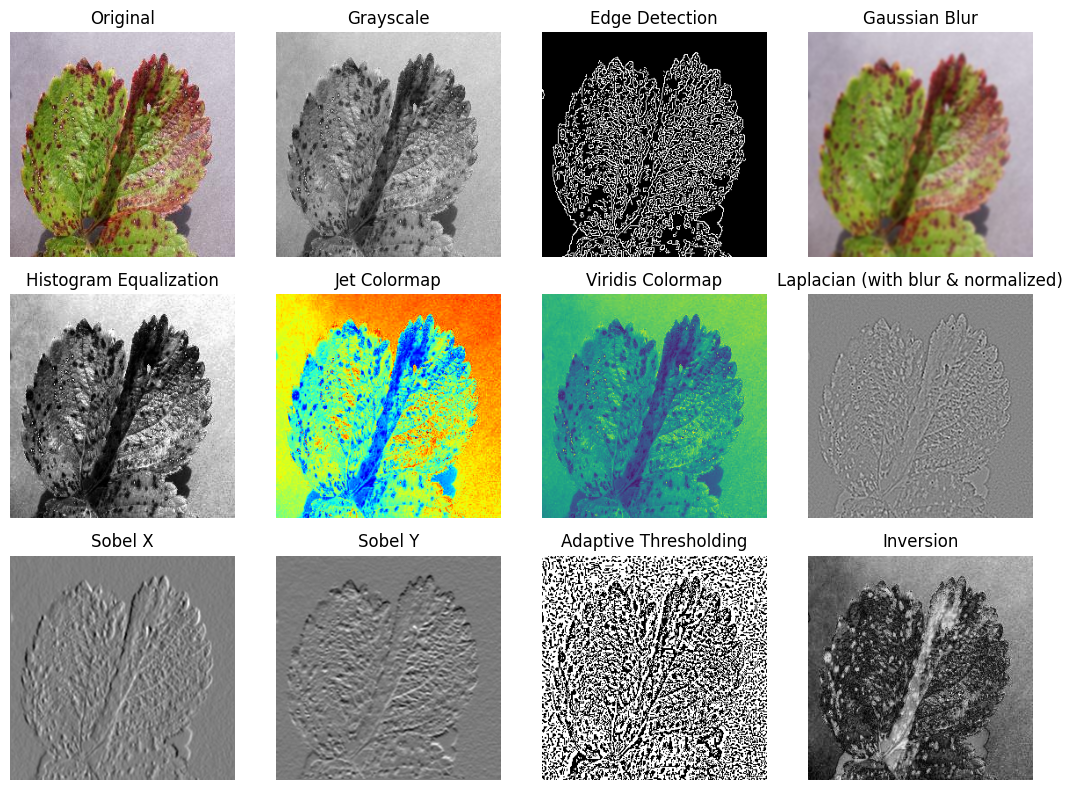

In [33]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

# Load the image
image_path = './strawberry.JPG'
leaf_image = Image.open(image_path)

# Convert the image to a format usable with OpenCV and matplotlib
leaf_image_cv = np.array(leaf_image)
leaf_image_cv = cv2.cvtColor(leaf_image_cv, cv2.COLOR_RGB2BGR)

# Prepare a grid for displaying the original and various augmentations
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10.8, 8))

# Show the original image in the first position
axes[0, 0].imshow(cv2.cvtColor(leaf_image_cv, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title("Original")
axes[0, 0].axis("off")

# Convert to grayscale
gray_leaf = cv2.cvtColor(leaf_image_cv, cv2.COLOR_BGR2GRAY)

# 1. Grayscale
axes[0, 1].imshow(gray_leaf, cmap='gray')
axes[0, 1].set_title("Grayscale")
axes[0, 1].axis("off")

# 2. Edge Detection (Canny)
edges = cv2.Canny(leaf_image_cv, 100, 200)
axes[0, 2].imshow(edges, cmap='gray')
axes[0, 2].set_title("Edge Detection")
axes[0, 2].axis("off")

# 3. Gaussian Blur
blurred_leaf = cv2.GaussianBlur(leaf_image_cv, (7, 7), 0)
axes[0, 3].imshow(cv2.cvtColor(blurred_leaf, cv2.COLOR_BGR2RGB))
axes[0, 3].set_title("Gaussian Blur")
axes[0, 3].axis("off")

# 4. Histogram Equalization (on grayscale)
equalized_leaf = cv2.equalizeHist(gray_leaf)
axes[1, 0].imshow(equalized_leaf, cmap='gray')
axes[1, 0].set_title("Histogram Equalization")
axes[1, 0].axis("off")

# 5. Jet Colormap
jet_colormap = plt.get_cmap('jet')(gray_leaf)
axes[1, 1].imshow(jet_colormap)
axes[1, 1].set_title("Jet Colormap")
axes[1, 1].axis("off")

# 6. Viridis Colormap
viridis_colormap = plt.get_cmap('viridis')(gray_leaf)
axes[1, 2].imshow(viridis_colormap)
axes[1, 2].set_title("Viridis Colormap")
axes[1, 2].axis("off")

# 7. Laplacian (to highlight edges)
# 7. Laplacian (to highlight edges with preprocessing)
# Convert to grayscale if not already
gray_leaf = cv2.cvtColor(leaf_image_cv, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_gray_leaf = cv2.GaussianBlur(gray_leaf, (3, 3), 0)

# Apply Laplacian filter
laplacian = cv2.Laplacian(blurred_gray_leaf, cv2.CV_64F)

# Normalize the Laplacian image to scale between 0-255 for better visibility
laplacian_normalized = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Display the Laplacian image
axes[1, 3].imshow(laplacian_normalized, cmap='gray')
axes[1, 3].set_title("Laplacian (with blur & normalized)")
axes[1, 3].axis("off")

# 8. Sobel (X direction)
sobelx = cv2.Sobel(gray_leaf, cv2.CV_64F, 1, 0, ksize=5)
axes[2, 0].imshow(sobelx, cmap='gray')
axes[2, 0].set_title("Sobel X")
axes[2, 0].axis("off")

# 9. Sobel (Y direction)
sobely = cv2.Sobel(gray_leaf, cv2.CV_64F, 0, 1, ksize=5)
axes[2, 1].imshow(sobely, cmap='gray')
axes[2, 1].set_title("Sobel Y")
axes[2, 1].axis("off")

# 10. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_leaf, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
axes[2, 2].imshow(adaptive_thresh, cmap='gray')
axes[2, 2].set_title("Adaptive Thresholding")
axes[2, 2].axis("off")

# 11. Selective Inversion (Invert only the leaf)
# Threshold to create a mask for the leaf (assuming the leaf is darker than the background)
_, leaf_mask = cv2.threshold(gray_leaf, 120, 255, cv2.THRESH_BINARY_INV)

# Invert only the leaf part
inverted_leaf_only = cv2.bitwise_not(gray_leaf, mask=leaf_mask)

# Combine the inverted leaf with the original background
combined_inverted = np.where(leaf_mask[..., None], inverted_leaf_only[..., None], gray_leaf[..., None])

# Show the selectively inverted image
axes[2, 3].imshow(combined_inverted, cmap='gray')
axes[2, 3].set_title("Inversion")
axes[2, 3].axis("off")

# Adjust layout
plt.tight_layout()
plt.savefig('different_color.png')
plt.show()

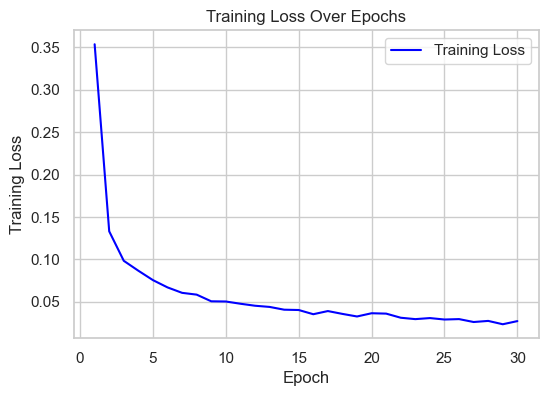

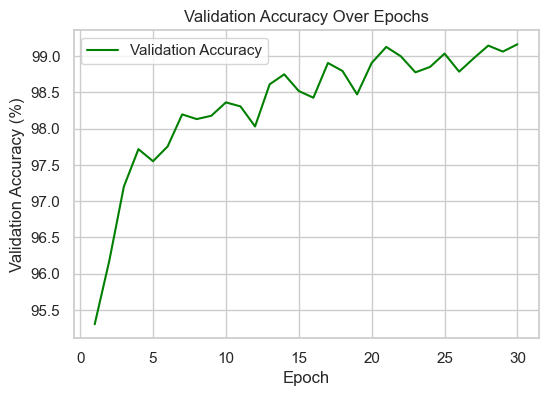

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("training_metrics.csv")  

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x="epoch", y="train_loss", color="blue", label="Training Loss")
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.savefig("training_loss_plot.png")
plt.show()

plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x="epoch", y="val_accuracy", color="green", label="Validation Accuracy")
plt.title("Validation Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy (%)")
plt.legend()
plt.savefig("validation_accuracy_plot.png")
plt.show()
